# Introduction to `matplotlib`
This notebook provides a basic introduction to plotting with the most popular graphing package in python, [`matplotlib`](https://matplotlib.org), in the context of an example: visualizing the data output from the first CHAP example pipeline.

## Notebook setup
1. Import the modules we will use.
1. Run the [ipython magics](https://ipython.readthedocs.io/en/stable/interactive/magics.html) to make plots appear nicely in the notebook.
1. Choose the sub-example to visualize in this notebook.
1. Load the output data from the chosen example pipeline.

In [ ]:
# Import modules
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# ipython magic for simple inline display of matplotlib plots
# (you can read more about ipython magics here: https://ipython.readthedocs.io/en/stable/interactive/magics.html)
%matplotlib inline

In [ ]:
# Choose which sub-example to visualize -- uncomment one of the following lines before running this cell:
# sub_example = 'cbf'
# sub_example = 'h5'

In [ ]:
# Load data
npz_filename = f'output_{sub_example}/azimuthally_integrated.npz'
npz_file = np.load(npz_filename)
data = {name: value for name, value in npz_file.items()}
npz_file.close()

## Inspect data

## 2D Plots of Diffraction Patterns

In [ ]:
# Use an image file reader developed specifically for 2D X-ray detectors called "FabIO"
# (you can read more about FabIO here: https://www.silx.org/doc/fabio/latest/index.html)
# FabIO is handy because it provides a single method that can load detector
# data as a numpy array from any of the commonly-used X-ray area detector data
# file formats -- this means we can use the exact same code to read detector
# data whether it was saved as .cbf, .h5, .tiff, etc.
import fabio

image_file = f'/nfs/chess/user/x-cite/data/example_01/{sub_example}/detector_data_00.{sub_example}'
with fabio.open(image_file) as i:
    image_data = i.data

plt.imshow(image_data)
plt.show()

In [ ]:
# Plot the same data on a log color scale:
import matplotlib.colors as colors
plt.imshow(image_data, norm=colors.LogNorm())
plt.show()

In [ ]:
# Add a colorbar:
plt.imshow(image_data, norm=colors.LogNorm())
plt.colorbar()
plt.show()

## 1D Plots of Integrated Diffraction Patterns

In [ ]:
# What arrays were in the npz file?
for k, v in data.items():
    print(f'data["{k}"] is an {type(v).__name__} with shape {v.shape}')

In [ ]:
# Plot the radial coordinate values
plt.plot(data['radial'])
plt.show()

In [ ]:
# Add axis labels, a legend, and style the line
plt.plot(data['radial'], linestyle=' ', marker='*', label='Radial Coordinate')
plt.title('Radial Coordinate Values')
plt.xlabel('Coordinate Index')
plt.ylabel('Coordinate Value (q_nm^-1)')
plt.legend()
plt.show()

In [ ]:
# Plot one of the intensity spectra against the radial coordinate values
plt.plot(data['radial'], data['intensity'][0])
plt.xlabel('q_nm^-1')
plt.ylabel('Integrated Intensity')
plt.title('First Integrated Intensity Spectrum')
plt.show()

## 2D Plots of Integrated Diffraction Patterns

In [ ]:
plt.pcolormesh(data['radial'], np.arange(data['intensity'].shape[0]), data['intensity'])
plt.xlabel('q_nm^-1')
plt.ylabel('Frame index')
plt.title('All Integrated Frames')
plt.show()

## Exercises
1. [Add axis labels & a colorbar](#Exercise-1)
1. [Add axis labels & a legend](#Exercise-2)
1. [Make a simplified 2D waterfall plot](#Exercise-3)

### Exercise 1
#### Change an axis label
Prompt:
The cell below contains code to plot the all the 1D intgrated diffraction patterns as an image with a log scale. Add appropriate x- and y- axis labels, a colorbar, and a title to the plot. Your result should look something like the image below.

![Exercise 1](images/exercise_1.png)

In [ ]:
plt.pcolormesh(data['radial'], np.arange(data['intensity'].shape[0]), data['intensity'], norm=colors.LogNorm())
plt.show()

### Exercise 2
Prompt:
The cell below contains code to plot the integrated spectrum from the 5th frame of data. Add an appropriate legend label and axis labels for the data. Your result should look something like the image below.

![Exercise 2](images/exercise_2.png)

In [ ]:
plt.plot(data['radial'], data['intensity'][5])
plt.show()

### Exercise 3
Prompt:
The cell below contains code to plot the first two integrated spectra as a simplified version of a waterfall plot. Plot every third integrated spectra in this simplified waterfall plot, add apprpriate axis labels, and a legend. Your result should look something like the image below (hint: your code should loop over the spectra to plot each third one).

![Exercise 3](images/exercise_3.png)

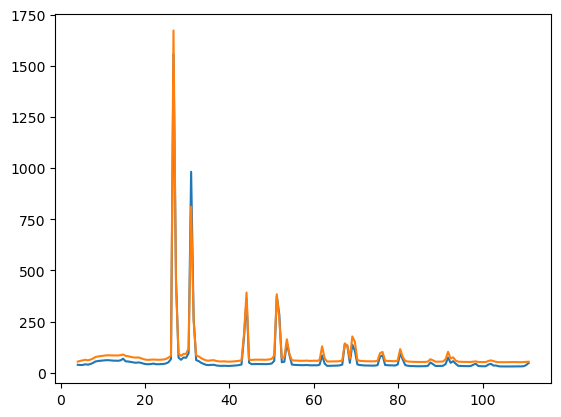

In [97]:
plt.plot(data['radial'], data['intensity'][0])
plt.plot(data['radial'], data['intensity'][3] + 20)
plt.show()